## 读取数据

In [1]:
import json
import networkx as nx
import numpy as np

In [172]:
with open('MC1.json', 'r') as file:
    json_data = json.load(file)
nodes = json_data['nodes']
links = json_data['links']

In [173]:
G = nx.DiGraph()
edges = []
for link in links:
    edges.append((link['source'], link['target']))
G.add_edges_from(edges)

In [174]:
suspected_entities  = ["Mar de la Vida OJSC", "979893388", "Oceanfront Oasis Inc Carriers", "8327"]

def selected_idx(selected_cc):     # 寻找可疑节点所在的强/弱连通分量
    idx = -np.ones(4)
    for i in range(len(selected_cc)):
        if "Mar de la Vida OJSC" in selected_cc[i]:
            idx[0] = i
        if "979893388" in selected_cc[i]:
            idx[1] = i
        if "Oceanfront Oasis Inc Carriers" in selected_cc[i]:
            idx[2] = i
        if "8327" in selected_cc[i]:
            idx[3] = i
    return idx

In [175]:
import matplotlib.pyplot as plt
def generate_plot(selected_cc, x, title):
    # 柱状图的数据
    cc_idx = range(len(selected_cc))
    values = [len(temp) for temp in selected_cc]

    # 创建柱状图
    plt.bar(cc_idx, values)

    # 标出可疑实体所在的CC
    for i in idx:
        i = int(i)
        if i != -1:
            plt.bar(cc_idx[i], values[i], color='red')

    # 添加标题和轴标签
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("count")

    # 标注数据
    for i in range(len(cc_idx)):
        plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

    # 显示图形
    plt.show()

## Strongly connected components

不同分量之间的节点则不具备相互可达性

In [176]:
scc = list(nx.strongly_connected_components(G))

selected_scc = list()
cnt = 0
for component in scc:
    if len(component)>1:
        cnt += len(component)
        selected_scc.append(component)
        print(component)

{'芒聙聹especially', 'Lindsey Palmer', 'Jasmine Camacho'}
{'457009514', '99575926'}
{'78135', '79139'}
{'James Stewart', '1968776'}
{'76', '58', 'Armed Robbery芒', 'Cynthia Williams'}
{'977', '4946'}
{'374585759', '59662085'}
{'805275', '94361818'}
{'Pontus Navigation Corp', 'Triton Navigation Corp'}
{'Kari Padilla', '7490484'}
{'Patricia Hunter', 'Christine Maxwell', '324989705', '8814', 'Samuel Stokes', '30', '43185', '6', '2421', '75471', 'Nutica del Sol AG', '芒聙聹Compliance', '19285', 'Diao er Ltd. Corporation Transport', '9786', '80737369', '41870892-4565-42cd-9374-8665d01e9aa9', 'Icelandic Shrimp Corporation Transport', 'Mrs. Melinda Richardson', 'f656719b-783e-452b-801f-f60895068b23', '4962642', '858773', '9067', '55394387', 'Kari Zavala', 'Mario Richardson', '979893388', 'Sea Breezes GmbH & Co. KG Lighthouse', 'e1d7b4ac-ed31-42a4-9375-4afb0f78f276', '143129355', '438', 'Water World LLC Express', 'Luis Jones', '46319064', 'Scott Wright', '85946', '2919', '90562', 'Daniel Chang', '291

In [177]:
print(f"There are {len(selected_scc)} strongly connected components (size>1).")

There are 21 strongly connected components (size>1).


In [178]:
print(f"There are {cnt} nodes that are in selected scc.")  # 总共3428个node

There are 929 nodes that are in selected scc.


In [179]:
idx = selected_idx(selected_scc)
print(idx)    # "Oceanfront Oasis Inc Carriers"不在最大的SCC里，单独成SCC

[10. 10. -1. 10.]


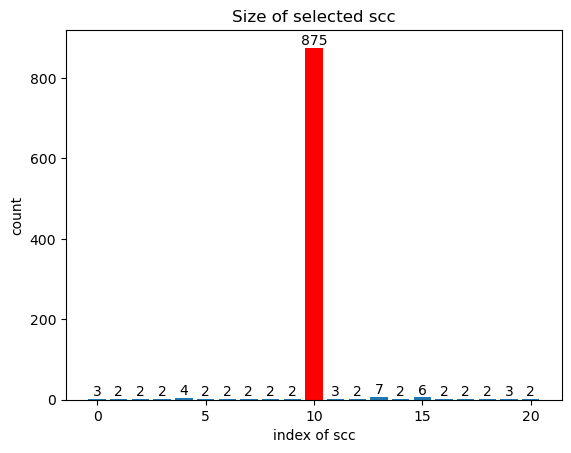

In [180]:
generate_plot(selected_scc, x = "index of scc", title = "Size of selected scc")

## Weakly connected components

In [181]:
wcc = list(nx.weakly_connected_components(G))

selected_wcc = list()
isolated_node = list()
cnt = 0
for component in wcc:
    if len(component)>1:
        cnt += len(component)
        selected_wcc.append(component)
        print(component)
    else:
        isolated_node.append(component)

{'35881', '8513', 'Patricia Hunter', 'Greenwich', 'Christine Maxwell', '324989705', 'bc507d7c-29c9-4b0d-909e-52dd450a25d3', 'Nutica del Sol AG', 'Gen International', 'Amanda Gibson', 'DOF芒聙聶s Long Xing', '93ac5fec-5f52-4431-a3ff-91430a8062f6', '9838', 'Benjamin Barton', 'Gregory Moore', 'Diao er Ltd. Corporation Transport', '61057213', 'Sara Jenkins', '95230042', 'Dutch Herring Inc Transportation', 'Emily Norton', 'Alexis Murphy', 'Melanie Miller', '8701038', '120', '2658', 'Megan Gonzales', 'Curtis Grant', '46319064', '7423', '272735814', 'MeWe Vimeo', '165e0fe7-6725-4f4c-abc1-3ef485a939b0', '9a651d73-d88f-4f9c-9497-7321ef575c6f', '47562016', '芒聙聵exemplary芒', 'Irish Sea Seaside GmbH & Co. KG Distribution', 'Amanda Andrews', 'Tyler Flores', '454', '705283b0-cdb7-4f0a-8481-b3fea243a8e5', '99575926', '芒聙聵This', 'Michelle Aguilar', '91dcf36d-dba8-41e8-a4cc-912981a27296', 'Gregory Marsh', 'Sikkim S.A. de C.V.', 'Brandon Stone', '314', 'Thomas Johnson', '66538530', 'George Ramirez', '884648

In [182]:
print(f"There are {len(selected_wcc)} weakly connected components (size>1).")

There are 83 weakly connected components (size>1).


In [183]:
print(f"There are {cnt} nodes that in selected wcc.")  # 总共3428个node 有1个孤立点?

There are 3427 nodes that in selected wcc.


In [184]:
print(isolated_node)     #该孤立点没有被记录 应该是因为前面创建有向图只记录了边，而该孤立点没有边与其相连

[]


In [185]:
idx = selected_idx(selected_wcc)
print(idx)

[0. 0. 0. 0.]


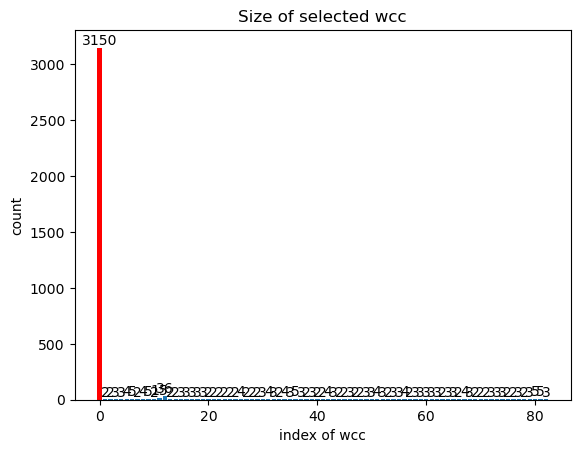

In [186]:
generate_plot(selected_wcc, x = "index of wcc", title = "Size of selected wcc")